In [ ]:
# Conducting experiments on the sharpness of the bound on the injectivity radius of the Stiefel manifold

In [1]:
#!pip install import-ipynb

import scipy
import numpy as np
from numpy import random

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from matplotlib import cm

import sys

import pickle

import pprint

import import_ipynb

import Stiefel_Exp_Log                as StEL
import Stiefel_Aux        as StAux

importing Jupyter notebook from Stiefel_Exp_Log.ipynb
importing Jupyter notebook from Stiefel_Aux.ipynb
(200, 90)


In [2]:
#functions

def Test_Rank_Log(n,p,mu_list,runs):
    # calculate reached cut points for different starting points U0 in St(n,p).
    #
    # Input:
    # n,p: dimensions of St(n,p).
    # mu_list: list of different length of tangent vectors defining the examined geodesics.
    # runs: number of different starting points U0.
    #
    # Output:
    # rank_to_mu: Sparse matrix saving the number of reached cut points for the rank of each tangent vector defining the
    #             examined geodesic.

    rank_to_mu = scipy.sparse.lil_matrix((p,len(mu_list)))
    
    tau = 1.0e-12
    
    for r in range(runs):
        #create random starting point U0
        #X =  random.rand(n,p)
        #U0, R = scipy.linalg.qr(X, overwrite_a=True,\
                                        #lwork=None,\
                                        #mode='economic',\
                                        #pivoting=False,\
                                        #check_finite=True)
        U0 = np.concatenate((np.eye(p),np.zeros((n-p,p))))
        
        #create random Tangent vectors with rank 1,...,p
        Delta_list = np.zeros((p,n,p))

        for i in range(p):
            Delta_list[i,:,:] = StEL.create_random_rank_TangentVec(U0,i+1)
        #end for i

        for j in range(p):
            notinj = 1
            for i in range(len(mu_list)):
                if notinj:
                    Delta = np.dot(mu_list[i],Delta_list[j,:,:])
                    U = StEL.Stiefel_Exp(U0,Delta)
                    #Try to compute Stiefel_Log 
                    Deltanew, conv = StEL.Stiefel_Log(U0,U,tau)
       
                    if (np.linalg.norm(Delta-Deltanew) > 1.0e-5) and (mu_list[i] >= np.lib.scimath.sqrt(StAux.alphaMetric(Deltanew, Deltanew, U0,0.0))) and (np.linalg.norm(U-StEL.Stiefel_Exp(U0,Deltanew)) < 1.0e-5):
                        #Delta is not equal to Deltanew and ||Deltanew|| < mu = ||Delta||. 
                        #Therefore, a shorter geodesic was found and the cut point of the examined geodesic was already reached                        
                        
                        notinj = 0
                        #save 'cut point'
                        rank_to_mu[j,i] += 1
                        
                        for k in range(i+1,len(mu_list)):
                            rank_to_mu[j,k] += 1
                        #end for k
                        

    #end for j
    return rank_to_mu.tocsr()
#end fct


def add_elOverMu(Dict,const_rel):
    # Add reached cut points for each distance mu.
    
    failed_mu = np.zeros(Dict[list(Dict.keys())[0]].get_shape()[1])
    
    for key in Dict.keys():
        A = Dict[key]
        entries = A.nonzero()
        for i in range(A.getnnz()):
            failed_mu[entries[1][i]] += A[entries[0][i],entries[1][i]]
        #end for i
    #end for key
    
    return failed_mu/const_rel


def add_elOverRank(Dict,ranks):
    # Add reached cut points for each rank of the tangent vector.
    
    failed_ranks = np.zeros(len(ranks))
    
    for key in Dict.keys():
        A = Dict[key]
        entries = A.nonzero()
        for i in range(A.getnnz()):
            failed_ranks[entries[0][i]] += A[entries[0][i],entries[1][i]]
        #end for i
    #end for key
    
    return failed_ranks/ranks

In [30]:
#Initialize
nmin = 4
nmax = 100

pmin = 2
pmax = 15

#Dimensions of the Stiefel manifolds that should be examined
n = np.linspace(nmin,nmax,nmax-nmin+1,dtype = np.int32)
p = np.linspace(pmin,pmax,pmax-pmin+1, dtype = np.int32)
runs = 25

#set number of reached cut points in relation to the number of total runs
rel = True
const_rel = 0

if not(rel):
    const_rel = 1
    
#number of runs for each rank
ranks = np.zeros(pmax)

mu_list = np.linspace(2.8,3.1,31)#np.linspace(2.86,2.95,19)#

In [31]:
#Conducting experiments on each manifold St(n,p) for the different n,p
d={}

for i in range(len(n)):
    list_p = []
    for j in range(len(p)):
        #if n[i]-1 > p[j]:
        if n[i] >=2*p[j]:
            print("n:",n[i],"p:",p[j])
            
            d[(n[i],p[j])] = Test_Rank_Log(n[i],p[j],mu_list,runs)
            if rel:
                const_rel += p[j]*runs
            ranks[0:p[j]] += len(mu_list)*runs

print("Done")

n: 4 p: 2
n: 5 p: 2
n: 6 p: 2
n: 6 p: 3
n: 7 p: 2
n: 7 p: 3
n: 8 p: 2
n: 8 p: 3
n: 8 p: 4
n: 9 p: 2
n: 9 p: 3
n: 9 p: 4
n: 10 p: 2
n: 10 p: 3
n: 10 p: 4
n: 10 p: 5
n: 11 p: 2
n: 11 p: 3
n: 11 p: 4
n: 11 p: 5
n: 12 p: 2
n: 12 p: 3
n: 12 p: 4
n: 12 p: 5
n: 12 p: 6
n: 13 p: 2
n: 13 p: 3
n: 13 p: 4
n: 13 p: 5
n: 13 p: 6
n: 14 p: 2
n: 14 p: 3
n: 14 p: 4
n: 14 p: 5
n: 14 p: 6
n: 14 p: 7
n: 15 p: 2
n: 15 p: 3
n: 15 p: 4
n: 15 p: 5
n: 15 p: 6
n: 15 p: 7
n: 16 p: 2
n: 16 p: 3
n: 16 p: 4
n: 16 p: 5
n: 16 p: 6
n: 16 p: 7
n: 16 p: 8
n: 17 p: 2
n: 17 p: 3
n: 17 p: 4
n: 17 p: 5
n: 17 p: 6
n: 17 p: 7
n: 17 p: 8
n: 18 p: 2
n: 18 p: 3
n: 18 p: 4
n: 18 p: 5
n: 18 p: 6
n: 18 p: 7
n: 18 p: 8
n: 18 p: 9
n: 19 p: 2
n: 19 p: 3
n: 19 p: 4
n: 19 p: 5
n: 19 p: 6
n: 19 p: 7
n: 19 p: 8
n: 19 p: 9
n: 20 p: 2
n: 20 p: 3
n: 20 p: 4
n: 20 p: 5
n: 20 p: 6
n: 20 p: 7
n: 20 p: 8
n: 20 p: 9
n: 20 p: 10
n: 21 p: 2
n: 21 p: 3
n: 21 p: 4
n: 21 p: 5
n: 21 p: 6
n: 21 p: 7
n: 21 p: 8
n: 21 p: 9
n: 21 p: 10
n: 22 p: 2
n: 22 p: 

2.87


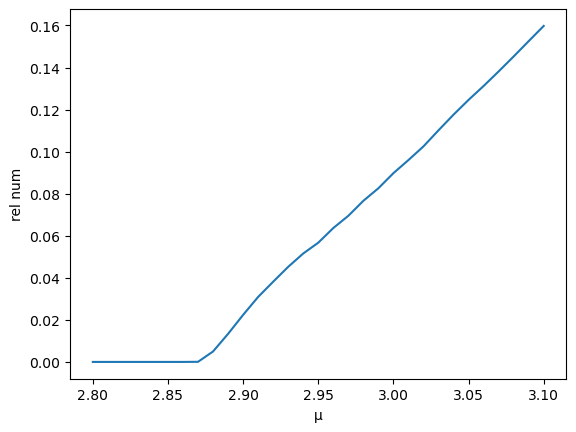

In [32]:
#relative number of reached cut points sorted by different distances mu
min_mu = 5;
for key in d.keys():
    a = (d[key].nonzero())[1]
    if len(a):
        act_min = mu_list[np.min(a)]
        if act_min < min_mu:
            min_mu = act_min
print(min_mu)

cutpoints = add_elOverMu(d,const_rel)
plt.plot(mu_list, cutpoints)

#plt.xlabel('geodesic length')
plt.xlabel('μ')
plt.ylabel('rel num')

plt.show()

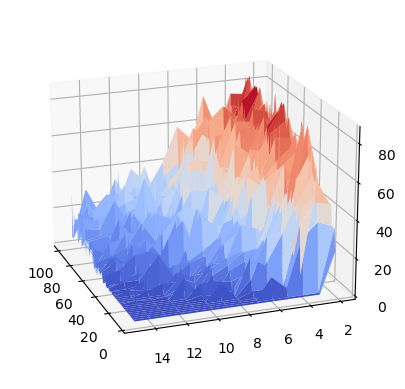

In [22]:
#number of reached cut points for different dimensions n,p of the Stiefel manifold

def f(X,Y,Dict,mu_range): 
    Z = np.zeros(X.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            try:
                A = Dict[(X[i,j],Y[i,j])]
                for m in range(A.shape[0]):
                    Z[i,j] += np.sum(A[m,0:mu_range])
                #end for m
            except:
                Z[i,j] = 0
        #end for j
    #end for i
    return Z
#end f

fig = plt.figure()
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
 
# defining all 3 axes
x = n
y = p
mu_range = len(mu_list) #index in mu_list to which the distances mu should be considered
X, Y = np.meshgrid(x, y)
Z = f(X, Y, d, mu_range) 
 
# plotting
ax.plot_surface(X, Y, Z, cmap = cm.coolwarm)
ax.view_init(20, 160)
plt.show()

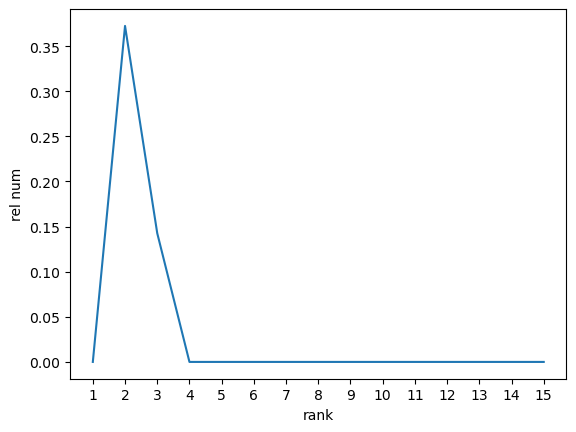

In [34]:
#relative number of reached cut points sorted by different ranks of the tangent vectors

plt.plot(range(1,pmax+1), add_elOverRank(d,ranks))

plt.xlabel('rank')
plt.xticks(range(1,pmax+1))
plt.ylabel('rel num')

plt.show()

In [29]:
#d = pickle.load(open("np_dict_rankall_run2_4to100_2to15_mu2.8to31step31_newstop.pkl","rb"))
d = pickle.load(open("np_dict_rankall_run2_4to100_2to15_mu2.8to31step31_newstop.pkl","rb"))

#in "np_dict_rankall_run2_4to100_2to15_mu2.8to31step31_newstop.pkl" sind alle Ränge
#"np_dict_rankall_run25_4to100_2to7_mu2.86to295step19_newstop.pkl" (eig nur 15 runs)

#"np_dict_rankall_run2_4to100_2to7_mu2.865to288step31_newstop.pkl" 
#"np_dict_rankall_run5_4to100_2to7_mu2.86to295step10_newstop.pkl"

In [6]:
pickle.dump(d,open("np_dict_rankall_run25_4to100_2to7_mu2.86to295step19_newstop.pkl","wb"))